In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Explore Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Rating features

In [5]:
data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

Vì chỉ có 1 giá trị có rating > 5, mà các giá trị còn lại đều từ 1->5 nên dễ dàng suy ra data này bị sai
-> Loại bỏ nó khỏi dữ liệu

In [6]:
data[data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
data.drop(data.index[10472], inplace=True)

In [8]:
data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


<AxesSubplot:xlabel='Rating', ylabel='Count'>

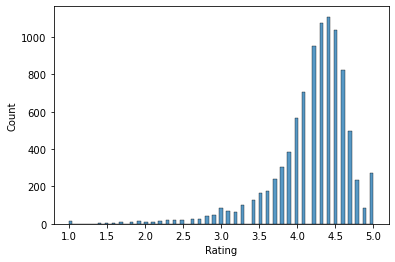

In [9]:
sns.histplot(data['Rating'])

## Installs features

Xóa bỏ dấu '+' và convert về dạng numeric

In [10]:
data['Installs'] = data['Installs'].map(lambda x : x.rstrip('+'))
data['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10840, dtype: object

Xóa bỏ nốt dấu ','

In [11]:
data['Installs'] = pd.to_numeric(data['Installs'].str.replace(',', ''))
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [12]:
data.Installs.describe()

count    1.084000e+04
mean     1.546434e+07
std      8.502936e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Có thể thấy range của Install quá lớn (0->10^9)
-> Gọi hàm log10 để thu hẹp range, đặt tên columns mới là log_installs

In [13]:
data['Log_installs'] = np.log10(data['Installs'])
data['Log_installs']

/home/kxss/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        4.00000
1        5.69897
2        6.69897
3        7.69897
4        5.00000
          ...   
10836    3.69897
10837    2.00000
10838    3.00000
10839    3.00000
10840    7.00000
Name: Log_installs, Length: 10840, dtype: float64

Vì báo lỗi ko thể tính log(0) nên sẽ kiểm tra xem liệu có bao nhiêu app có lượt tải là 1, log(1) = 0, ta sẽ gán những app ko có lượt tải = 0, và những app có lượt tải = 1 vs giá trị 0.1 (...)

In [14]:
data[data['Installs'] == 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_installs
649,Healthy Relationships Guide,DATING,NaN,0,8.2M,1,Free,0,Everyone,Dating,"July 31, 2018",2.0,4.0.3 and up,0.0
652,PlusOne,DATING,NaN,0,10M,1,Free,0,Mature 17+,Dating,"July 17, 2018",1.1.1,4.2 and up,0.0
2422,Visualmed,MEDICAL,NaN,0,3.1M,1,Paid,$2.99,Everyone,Medical,"August 1, 2018",1.0,4.1 and up,0.0
2425,Be the Expert in Phlebotomy - Professional Nur...,MEDICAL,NaN,0,5.0M,1,Paid,$0.99,Everyone,Medical,"July 24, 2018",1.0,4.0.3 and up,0.0
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,F-O-Meter,FAMILY,NaN,0,2.8M,1,Free,0,Mature 17+,Entertainment,"August 2, 2018",1.0.1,4.0 and up,0.0
10708,Custos F.O.,BUSINESS,NaN,0,9.7M,1,Free,0,Everyone,Business,"June 20, 2018",4.1.0,4.1 and up,0.0
10745,FP Boss,FINANCE,NaN,1,5.8M,1,Free,0,Everyone,Finance,"July 27, 2018",1.0.2,5.0 and up,0.0
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,885k,1,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up,0.0


In [15]:
index_ins_1 = data[data['Installs'] == 1].index
index_ins_0 = data[data['Installs'] == 0].index
index_ins_1, index_ins_0

(Int64Index([  649,   652,  2422,  2425,  2454,  2462,  2471,  4218,  4459,
              4471,  4550,  5126,  5160,  5171,  5500,  5812,  5832,  5837,
              5846,  5857,  5917,  5921,  6239,  6257,  6277,  6479,  6624,
              6888,  6962,  7225,  7231,  7370,  7521,  7522,  7737,  8019,
              8150,  8242,  8355,  8489,  8509,  8612,  8729,  8870,  8876,
              9101,  9104,  9139,  9201,  9262,  9264,  9302,  9453,  9532,
              9664, 10101, 10299, 10417, 10530, 10541, 10654, 10697, 10701,
             10708, 10745, 10764, 10775],
            dtype='int64'),
 Int64Index([4465, 5307, 5486, 5945, 6692, 7434, 8081, 8614, 8871, 9148, 9337,
             9719, 9905, 9917, 9934],
            dtype='int64'))

In [16]:
data.loc[index_ins_1, 'Log_installs'] = 0.1
data.loc[index_ins_0, 'Log_installs'] = 0.0

In [17]:
data['Log_installs'].describe()

count    10840.000000
mean         4.881631
std          1.973857
min          0.000000
25%          3.000000
50%          5.000000
75%          6.698970
max          9.000000
Name: Log_installs, dtype: float64

Nhận thấy nếu ko có lượt install thì sẽ ko có reviews và rating (Rõ ràng) -> kiểm tra

In [18]:
data[data['Installs'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_installs
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up,0.0
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0,Paid,$13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up,0.0
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up,0.0
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0,Paid,$2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up,0.0
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up,0.0
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0,Free,0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up,0.0
8081,CX Network,BUSINESS,NaN,0,10M,0,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up,0.0
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up,0.0
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0,Free,0,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up,0.0
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0


Không nhận thấy cái nào sai :D

## Price features

In [19]:
data[data['Price'] != '0']['Price']

234       $4.99
235       $4.99
290       $4.99
291       $4.99
427       $3.99
          ...  
10735     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
10798     $1.04
Name: Price, Length: 800, dtype: object

Loại bỏ dấu '$' ra khỏi dữ liệu và chuyển về nummeric

In [20]:
x = data[data['Price'] != '0']['Price'].str.replace('$', '')
x

<ipython-input-20-8aaddd89d63f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  x = data[data['Price'] != '0']['Price'].str.replace('$', '')


234       4.99
235       4.99
290       4.99
291       4.99
427       3.99
         ...  
10735     0.99
10760     7.99
10782    16.99
10785     1.20
10798     1.04
Name: Price, Length: 800, dtype: object

In [21]:
data.loc[x.index, 'Price'] = x.loc[x.index]
data['Price'] = pd.to_numeric(data['Price'])

In [22]:
data.describe()

,Rating,Installs,Price,Log_installs
count,9366.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,1.546434e+07,1.027368,4.881631
std,0.515219,8.502936e+07,15.949703,1.973857
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,1.000000e+03,0.000000,3.000000
50%,4.300000,1.000000e+05,0.000000,5.000000
75%,4.500000,5.000000e+06,0.000000,6.698970
max,5.000000,1.000000e+09,400.000000,9.000000
